# Behavioral agency

[Wolfram Barfuss](https://wbarfuss.github.io) | [University of Bonn](https://www.uni-bonn.de) | 2024/2025 <br>
▶ **Complex Systems Modeling of Human-Environment Interactions**

In [1]:
#| echo: false
from IPython.display import IFrame
def iframe(url, width="100%", height=450, extras=None):
    return IFrame(url, width, height, extras)

## Motivation | **Agent-based modeling of complex systems**

The distinctive feature of the science of complex systems is the fascination that arises when **the whole becomes greater than the sum of its parts** (@fig-ComplexSystem) and properties on the macro-level emerge that do not exist on the micro-level.

![Properties of a complex system](images/01.01-ComplexSystem.png){#fig-ComplexSystem}


Complex systems thinking is instrumental in understanding the **interactions** between **society** and **nature** (@fig-ComplexNatureSocietySystems).


![Complex Society-Nature Systems](images/01.01-ComplexNatureSocietySystems.png){#fig-ComplexNatureSocietySystems}

**Agent-based models capture the features of a complex system in the most direct way**, in that they model the behavior of individual agents and their interactions.

### Learning goals

After this lecture, students will be able to:


1) Explain the history and rationale of agent-based modeling and generative social science
2) Explain the advantages and challenges of agent-based modeling
3) Simulate two famous agent-based models in Python
4) Implement animations in Python
5) Write object-oriented Python programs



In [2]:
import numpy as np  
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
import matplotlib.animation as animation
from IPython.display import HTML
from functools import partial

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5); plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; 
plt.rcParams['grid.linewidth'] = 0.25; 

## Overview | **Generative social science**

### Essence of agent-based modeling

An agent-based model **explicitly** represents the **individual units** of the system and their repeated **interactions**. Beyond this, no further assumptions are made in agent-based modeling [@IzquierdoEtAl2024].

Hence, agent-based modeling is **a very flexible modeling framework**.

> You can model anything with an agent-based model, but you are not guaranteed to understand it.

Adding complexity to your model allows you to study different phenomena. However, it can make the analysis and understanding of the model more difficult, even with advanced mathematics. As a result, agent-based models are usually created using a programming language and analyzed through computer simulation. This method is so common that agent-based modeling and simulation are often seen as synonymous [@IzquierdoEtAl2024].

### Generative Social Science

The flexibility of ABM offers a *generative* approach to social science [@Epstein1999]. **Explaining** the **emergence** of **macroscopic societal regularities** requires that one answers the following question:

> How could the **decentralized local interactions** of **heterogeneous autonomous agents** *generate* the **given regularity**?

Generative social science is a research approach that uses computational models to generate and explain complex social behaviors. It is characterized by a

- focus on explanation over prediction and
- its use of agent-based models to bridge the gap between micro and macro phenomena.


### Features of agent-based modeling

Agent-based modeling allows us to cover some features that traditionally have been difficult to analyze mathematically [@Epstein1999; @IzquierdoEtAl2024]:



* **Bounded Rationality**, which has two components: bounded information and bounded computing power. Typically, agents use more or less sophisticated rules or heuristics based on local information. They do not have global information or infinite computational power.

* **Autonomy and the micro-macro link**. ABM is particularly well suited to studying how global phenomena emerge from individual interactions and how these emergent global phenomena may constrain and shape individuals’ actions. In agent-based models, there is no central, or “top-down,” control over individual behavior. Micro and macro will typically co-evolve.

* **Out-of-equilibrium dynamics**. Dynamics are inherent to ABM. Running a simulation consists of repeatedly applying the rules that define the model. Equilibria are never imposed a priori; they may emerge as an outcome of the simulation, or they may not.

* **Agents’ heterogeneity**. Since agents are explicitly modeled, their diversity can vary according to the modeler's preferences. Agents may differ in myriad ways — genetically, culturally, by social network, by preferences — all of which may change or adapt endogenously over time. Representative or aggregated agent methods - common in dynamic systems or target equilibria models - or not used.

* **Local interactions and explicit space**. The fact that agents and their environment are represented explicitly in ABM makes it particularly straightforward and natural to model
local interactions.

* **Interdependencies between processes** (e.g., demographic, economic, biological, geographical, technological) that have traditionally been studied in different disciplines and are not often analyzed together. An agent-based model does not restrict the type of rules that can be implemented, so models can include rules linking disparate aspects of the world that are often studied in different disciplines. This feature makes ABM particularly well suited to studying complex Nature-Society systems.

### The generativist's experiment

A given macroscopic regularity is to be explained by the canonical agent-based experiment as follows [@Epstein1999]:

> Situate an **initial population** of **autonomous, heterogeneous agents** in a relevant spatial environment; - allow them to **interact** according to simple **local rules**, - and thereby generate - or "**grow**" - the macroscopic regularity from the bottom up.

**If you didn't grow it, you didn't explain its emergence.** This generativist approach to social science has been successfully applied to explain the following phenomena:

- economic classes (Axtell etl al. 1999)
- cooperation in spatial games (Lindgren and Nordahl, 1994; Epstein, 1998; Huberman and Glance, 1993; Nowak and May, 1992; Miller, 1996)
- voting behaviors (Kollman, Miller, and Page, 1992),
- demographic histories (Dean et al. 1999)
- trade networks (Tesfatsion, 1995; Epstein and Axtell, 1996),
- right-skewed wealth distributions (Epstein and Axtell, 1996)

... and many more!

### Variants of agent-based modeling

As agent-based modeling is so flexible, various subcategories of models can be distinguished:

- Cellular automata
- Network models
- Learning and evolution models in games
- ...

## Example | Conway's Game of Life

The Game of Life is a **cellular automaton** devised by the British mathematician John Horton Conway in 1970.

A cellular automaton is a discrete model of computation consisting of a regular grid of cells, each in one of a finite number of states (e.g., on and off).

The game of life is a very influential model in the field of complex systems (although Conway wasn't particularly proud of it)

See [Inventing Game of Life (John Conway) - Numberphile](https://www.youtube.com/watch?v=R9Plq-D1gEk) for a brief backstory on the game of life.

::: {.content-visible when-format="html"}

In [9]:
#| echo: false
iframe("https://www.youtube-nocookie.com/embed/R9Plq-D1gEk?si=p2sIUInYX3jaRcck")

:::

### Questions

The game of life is a comparably simple model to answer two very fundamental questions:

* How can something reproduce itself?
* How can a complex structure (like the mind) emerge from a basic set of rules?

### States

The cells of the cellular automaton can be in one of two states: dead or alive.


We can represent the state of a cell with a binary variable: 1 (black) for alive and 0 (white) for dead. The state of the whole system can the be represented as follows:

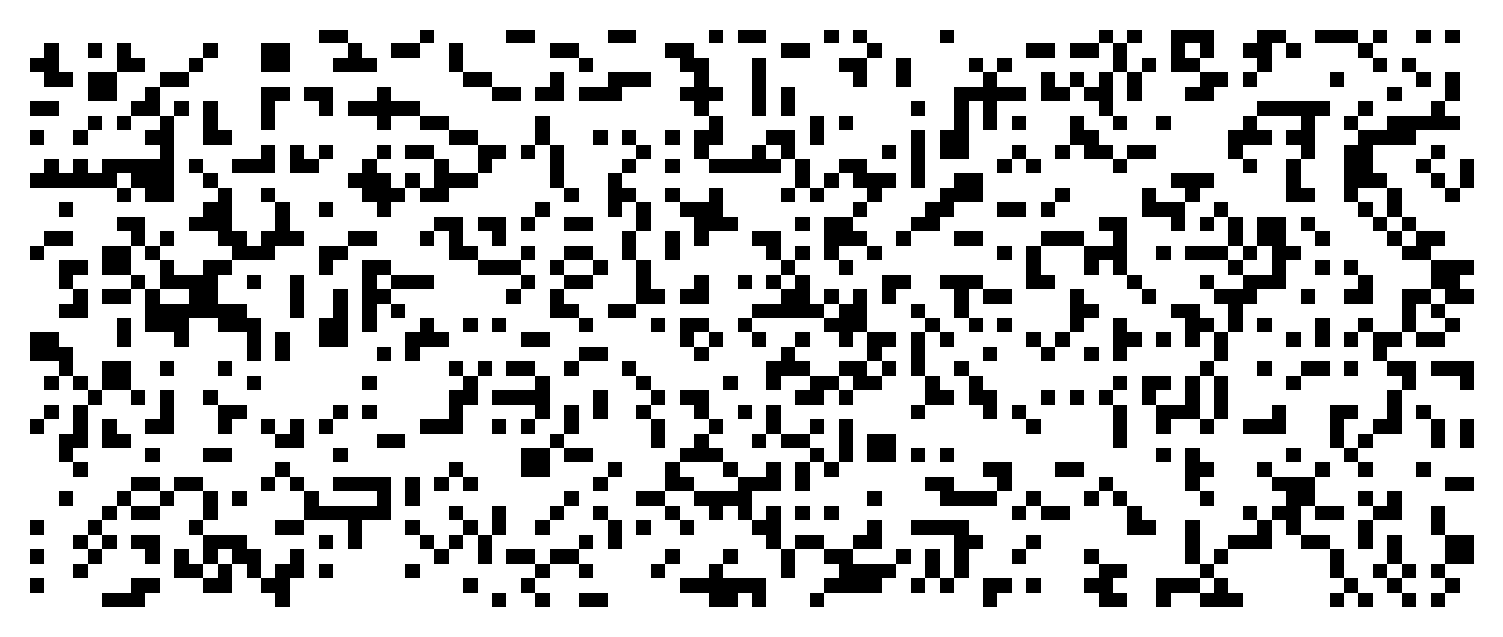

In [10]:
#| fig-cap: "A Game-of-Life grid"
ROWS, COLS = 40, 100  # define the size of the grid
grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[0.7, 0.3]) #generate random states
plt.imshow(grid, cmap='binary', interpolation='none') # plot the grid
plt.gca().set_xticks([]); plt.gca().set_yticks([]);  # remove x and y ticks

### Dynamics

The dynamics of the game of life are governed by the following rules:

- Living cells with fewer than two living neighbors die
- Living cells with more than three living neighbors die
- Dead cells with exactly three neighbors become alive

We will use the `matplotlib.animation.FuncAnimation` function to animate the game of life in Python. To do so, we need to implement the game's rules in a function that updates the grid.

It must receive the number of the current `frame` of the animation plus possible further function arguments. We supply it with an `image` argument variable representing the grid's image. It must return an iterable of artists, which the `matplotlib.animation.FuncAnimation` will use to update the plot.

In [11]:
# Function to update the grid based on the Game of Life rules
def update_grid(frame, image):
    global grid  # required to access the variable inside the function
    new_grid = grid.copy()

    for i in range(0, ROWS):
        for j in range(0, COLS):
            neighbors_sum = (  # the % sign is a modulo division, i.e., 13 % 13 = 0 
                grid[(i - 1) % ROWS, (j - 1) % COLS] + grid[(i - 1) % ROWS, j] +
                grid[(i - 1) % ROWS, (j + 1) % COLS] + grid[i, (j - 1) % COLS] +
                grid[i, (j + 1) % COLS] + grid[(i + 1) % ROWS, (j - 1) % COLS] +
                grid[(i + 1) % ROWS, j] + grid[(i + 1) % ROWS, (j + 1) % COLS])

            # the rules of the game
            if grid[i, j] == 1 and (neighbors_sum < 2 or neighbors_sum > 3):
                new_grid[i, j] = 0
            elif grid[i, j] == 0 and neighbors_sum == 3:
                new_grid[i, j] = 1

    grid = new_grid
    image.set_array(grid)
    return image,  # must return an iterable of artists 

With the `update_grid` function in place, we can now create the animation using the `FuncAnimation` function. The `%%caputure` magic command is used to suppress the output of the cell below, as we will call the animation separately.

In [25]:
%%capture
# Set up the Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(16,9))
im = ax.imshow(grid, cmap='binary', interpolation='none')
ax.set_xticks([]); ax.set_yticks([])

# Create animation
ani = animation.FuncAnimation(fig, partial(update_grid, image=im),
                              frames=150, interval=150)

Finally, we can display the animation using the `HTML` function from the `IPython.display` module.

In [26]:
# Display the animation using HTML
# HTML(ani.to_jshtml())

### Emerging structures

Despite the simplicity of the rules, complex structures of *species* **moving** and **reproducing** can emerge from these rules, despite them not having any concept of movement or reproduction.

See, for example, the [Epic Conway's Game of Life](https://www.youtube.com/watch?v=C2vgICfQawE&amp;start=69) or [Life in life](https://www.youtube.com/watch?v=xP5-iIeKXE8) videos.

::: {.content-visible when-format="html"}

In [27]:
#| echo: false
iframe("https://www.youtube-nocookie.com/embed/C2vgICfQawE?si=mZwjScJgUXtrdias&amp;start=69")

In [28]:
#| echo: false
iframe("https://www.youtube-nocookie.com/embed/xP5-iIeKXE8?si=pKbPoOqfOruDlFxT")

:::

### Impact

Although the rules are incredibly simple, it is impossible to say whether a given configuration persists or eventually dies out. **There are fundamental limits to prediction**.

It was shown that you can do any form of computation (that you can do on a regular computer) with the game of life.

Complex behavior does not require complicated rules. Complex behavior can emerge from simple rules. This realization has been a key insight of complexity sciences and has shaped the way complexity science is done today.

## Example | Schelling's segregation model

The second example model studies the phenomenon of racially segregated neighborhoods. The content here is heavily inspired by [QuantEcon's Quantitative Economics with Python](https://python.quantecon.org/schelling.html).


### Questions

We observe racially segregated neighborhoods. 

Does that mean that all residents are racists?

### Context

In 1969, Thomas C. Schelling developed a simple but striking model of racial segregation.

His model studies the dynamics of racially mixed neighborhoods.

Like much of Schelling’s work, the model shows how local interactions can lead to surprising aggregate structure.

In particular, it shows that relatively mild preference for neighbors of similar race can lead in aggregate to the collapse of mixed neighborhoods, and high levels of segregation.

In recognition of this and other research, Schelling was awarded the 2005 Nobel Prize in Economic Sciences (joint with Robert Aumann).

### The Model

We will cover a variation of Schelling’s model that is easy to program and captures the main idea.

#### Set-Up

Suppose we have two types of people: orange people and green people.

For the purpose of this lecture, we will assume there are 250 of each type.

These agents all live on a single-unit square.

The location of an agent is just a point $(x, y)$,  where $0 < x, y < 1$.

#### Preferences

We will say that an agent is *happy* if half or more of her 10 nearest neighbors are of the same type.

Here ‘nearest’ is in terms of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).

An agent who is not happy is called *unhappy*.

An important point here is that agents are not averse to living in mixed areas.

They are perfectly happy if half their neighbors are of the other color.

#### Behavior

Initially, agents are mixed together (integrated).

In particular, the initial location of each agent is an independent draw from a bivariate uniform distribution on $S = (0, 1)^2$.

Now, cycling through the set of all agents, each agent is now given the chance to stay or move.

We assume that each agent will stay put if they are happy and move if unhappy.

The algorithm for moving is as follows

1. Draw a random location in $S$  
1. If happy at the new location, move there  
1. Else, go to step 1  


In this way, we cycle continuously through the agents, moving as required.

We continue to cycle until no one wishes to move.

### Implementation

We use [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming) (OOP) to model agents as objects.

OOP is a programming paradigm based on the concept of objects, which can contain data and code: 
- data in the form of fields (often known as attributes or properties), and
- code in the form of procedures (often known as methods).



#### Agent class

A class defines how an object will work. Typically, the class will define several methods that operate on instances of the class. A key method is the `__init__` method, which is called when an object is created.

In [29]:
class Agent: 

    # The init method is called when the object is created.
    def __init__(self, type, num_neighbors, require_same_type): 
        self.type = type
        self.draw_location()
        self.num_neighbors = num_neighbors
        self.require_same_type = require_same_type

    def draw_location(self):
        self.location = np.random.uniform(0, 1), np.random.uniform(0, 1)

    def get_distance(self, other):
        "Computes the Euclidean distance between self and another agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return np.sqrt(a + b)

    def number_same_type(self, agents):
        "Number of neighbors of same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is the distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:self.num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        return sum(self.type == agent.type for agent in neighbors)

    def happy(self, agents):
        "True if a sufficient number of nearest neighbors are of the same type."
        num_same_type = self.number_same_type(agents)
        return num_same_type >= self.require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()

Testing the agent class:

In [30]:
A = Agent(0, num_neighbors=4, require_same_type=2)
type(A)

__main__.Agent

In [31]:
A.location

(0.9530720480796, 0.566243724536969)

Creating a list of agents:

In [32]:
np.random.seed(4)
agents = [Agent(0, 4, 2) for i in range(100)]
agents.extend(Agent(1, 4, 2) for i in range(100))
len(agents)

200

Is agent three happy?

In [33]:
a3 = agents[3]
a3.happy(agents), a3.location

(False, (0.9762744547762418, 0.006230255204589863))

Let's let agent three update its position:

In [34]:
a3.update(agents)

In [35]:
agents[3].happy(agents), agents[3].location

(True, (0.06780815958339637, 0.961674586087924))

#### Observation function

We implement a function to plot the distribution of agents.

In [36]:
def plot_distribution(agents, cycle_num, ax=None):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
    if ax is None: fig, ax = plt.subplots(figsize=(4, 4))
    plot_args = {'markersize': 4, 'alpha': 0.6}
    # ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(f'Cycle {cycle_num}')

Testing the observation function,

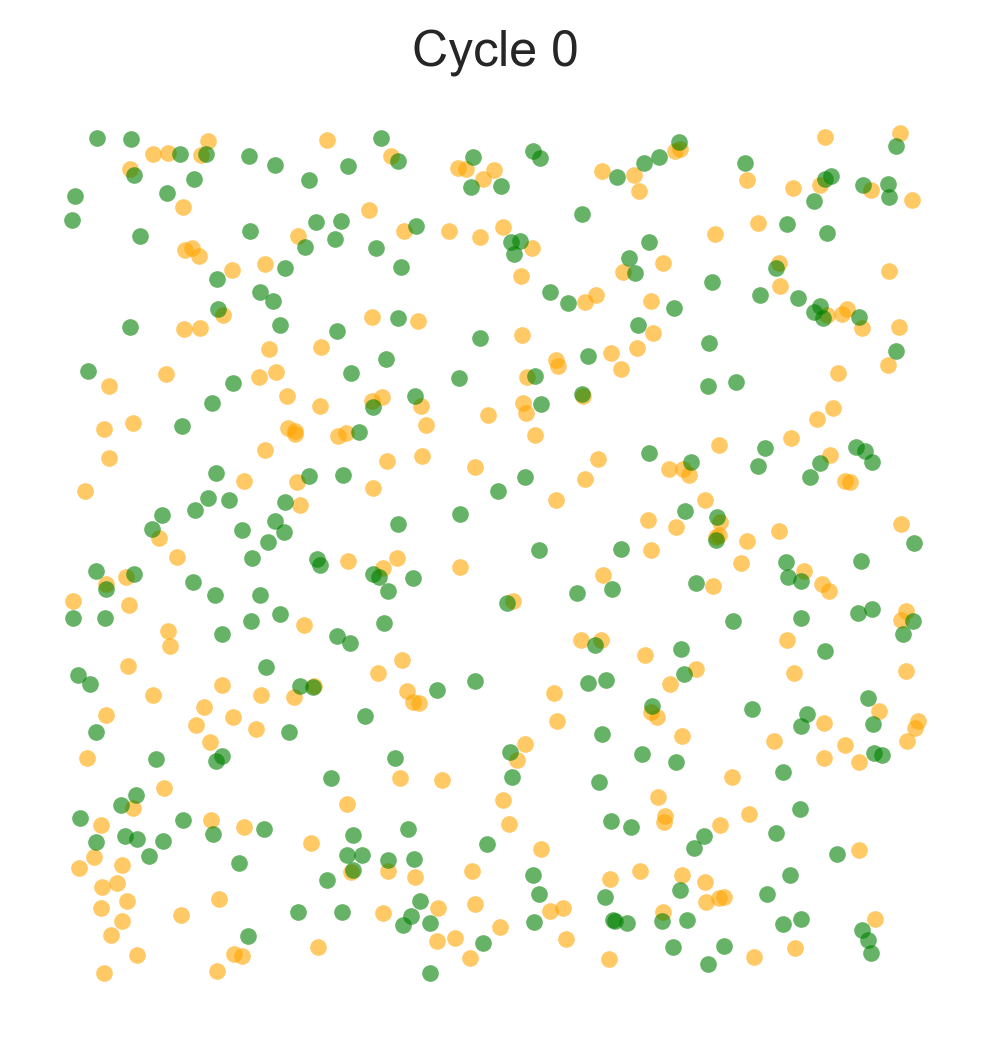

In [37]:
#| fig-cap: "Initial distribution of agents."
num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0, num_neighbors, require_same_type) for i in range(num_of_type_0)]
agents.extend(Agent(1, num_neighbors, require_same_type) for i in range(num_of_type_1))

plot_distribution(agents, 0)

#### Simulation run

Entering loop  1
Entering loop  2
Entering loop  3
Entering loop  4
Entering loop  5
Entering loop  6
Converged, terminating.


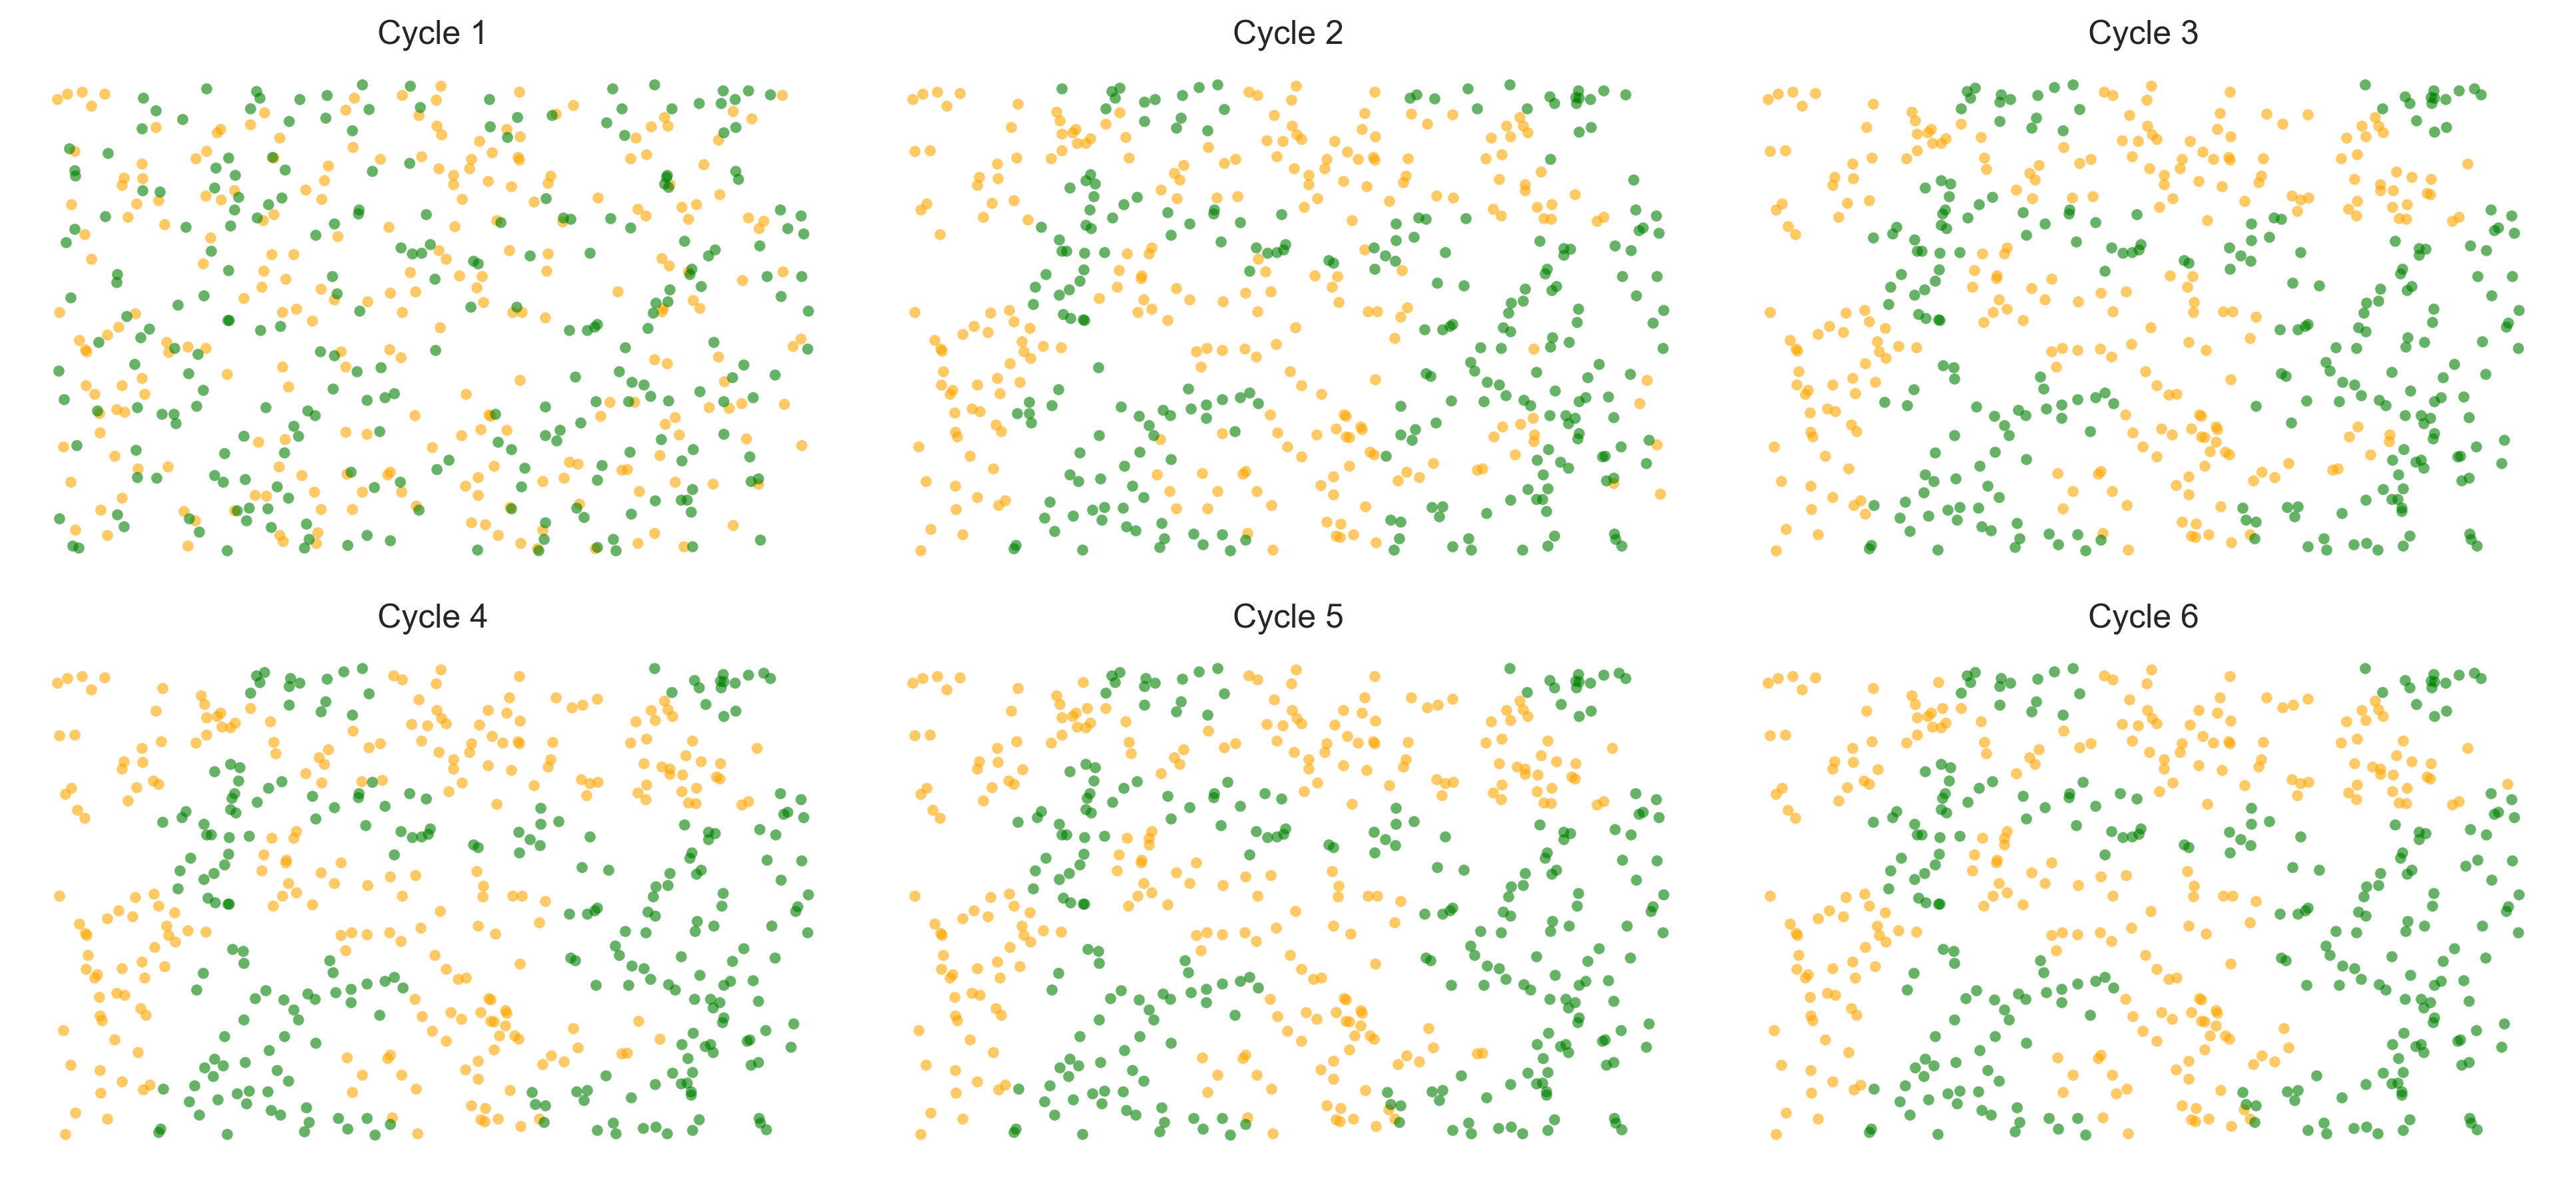

In [38]:
#| fig-cap: "A simulation run of Schelling's model."
np.random.seed(10)  # For reproducible random numbers

# == Main == #
num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0, num_neighbors, require_same_type) for i in range(num_of_type_0)]
agents.extend(Agent(1, num_neighbors, require_same_type) for i in range(num_of_type_1))

count = 1
# ==  Loop until none wishes to move == #
fig, axs = plt.subplots(2,3, figsize=(13, 6))
axs.flatten()

while True:
    print('Entering loop ', count)
    plot_distribution(agents, count, axs.flatten()[count-1])
    count += 1

    # Update and check whether everyone is happy
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break
    
print('Converged, terminating.')
plt.tight_layout()

In this instance, the program terminated after 6 cycles through the set of
agents, indicating that all agents had reached a state of happiness.

### Interpretation

What is striking about the pictures is how rapidly racial integration breaks down.

This is despite the fact that people in the model don’t actually mind living mixed with the other type.

Even with these preferences, the outcome is a high degree of segregation.

## Challenges of agent-based modeling

- **Performance Limitations**. The execution speed of ABMs can be slow, which can be a limitation for extensive simulations.
- **Transparency and Reproducibility**. Providing a clear and accessible description is challenging due to model complexity. 
- **Data Parameters and Validation**. Getting empirical data and validating models that may simulate unobservable associations is challenging.
- **Arbitrariness and Parameterization**. The many parameters that need to be set can lead to a high degree of arbitrariness.
- **Behavior modeling**. There are endless possibilities to design plausible behavioral rules. A sensitivity analysis is difficult.



 Up next

- **Reinforcement learning** as a principled model for behavior to counter some arbitrariness in parameterization behavioral rules.
- Synthesis: Collective reinforcement learning **dynamics** to counter performance limitations and a lack of transparency and reproducibility.

## Learning goals revisited


In this chapter, 

we covered the history and rationale of agent-based modeling: **generative social science**. 

We covered the advantages (**flexibility and expressiveness**) and challenges (**transparency**, **arbitrariness**, **performance**) of agent-based modeling

We implemented and simulated two famous agent-based models in Python: **Conway's Game of Life** and **Schelling's segregation model**.


We implement animations in Python using the `matplotlib.animations.FuncAnimation` function.


We wrote Schelling's segregation model as an **object-oriented program**.




::: {.content-hidden unless-profile="standalone"}

## References

:::

::: {.content-hidden unless-profile="housekeeping"}

## Housekeeping

With the following cells, we can convert this notebook into slides and a PDF handout. If you work with this notebook interactively, you can ignore them.

---
metadata-files: [_standalone-quarto.yml]
---

In [39]:
#| output: false 
!cp 04.01-BehavioralAgency.ipynb 04.01-BehavioralAgency_.ipynb
!quarto render 04.01-BehavioralAgency_.ipynb --to pdf --profile standalone
!mv 04.01-BehavioralAgency_.pdf __scripts/04.01-BehavioralAgency.pdf
!rm -r 04.01-BehavioralAgency_*

pandoc 
  to: latex
  output-file: 04.01-BehavioralAgency_.tex
  standalone: true
  pdf-engine: xelatex
  variables:
    graphics: true
    tables: true
    secnumdepth: 2
  default-image-extension: pdf
  metadata-files:
    - _standalone-quarto.yml
  toc-depth: 2
  
metadata
  documentclass: scrartcl
  classoption:
    - DIV=11
    - numbers=noendperiod
  papersize: A4
  header-includes:
    - '\KOMAoption{captions}{tableheading}'
  block-headings: false
  title: Behavioral agency
  bibliography:
    - CSMofHEI.bib
  geometry:
    - top=20mm
    - left=20mm
    - right=20mm
    - bottom=25mm
  link-citations: true
  number-depth: 2
  

Rendering PDF
running xelatex - 1
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  
running xelatex - 2
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode


:::